# Proyek Analisis Data: Nama dataset
- Kelompok : 2
- Anggota : </br>
10123038 - Muhamad Irsad Assopi</br>
10123015 - Yoan Ready Syavera</br>
10123028 - Rizky Al Farid Hafizh</br>
10123020 - Hizkia Imanuel Edho</br>
10123049 - Nur Ain Salimah</br>
10123062 - Wa Ode Syahwa Salsabilah</br>

# Menentukan Pertanyaan Bisnis

1. Berapa rata-rata waktu yang dibutuhkan untuk mengirimkan pesanan dari tanggal pembelian hingga tanggal pengiriman oleh kurir? - 10123028 - Rizky Al Farid Hafizh
2. Bagaimana faktor-faktor seperti durasi pengiriman, bulan, hari dalam seminggu, dan keterlambatan mempengaruhi pengelompokan pelanggan, dan bagaimana kita dapat memvisualisasikan serta menganalisis hubungan ini untuk memahami dan berpotensi mengurangi keterlambatan pengiriman? - 10123020 - Hizkia Imanuel Edho
3. Bagaimana distribusi status pengiriman (misalnya, apakah ada pesanan yang belum diterima)? - 10123049 - Nur Ain Salimah
4. Berapa rata-rata waktu antara pesanan dibuat hingga disetujui serta apa saja faktor yang mempengaruhinya ? - 10123062 - Wa Ode Syahwa Salsabilah
5. Berapa banyak pesanan yang berhasil dikirim dalam satu bulan terakhir? - 10123038 - Muhamad Irsad Assopi
6. Apakah ada perbedaan waktu pengiriman berdasarkan waktu pembelian? - 10123015 - YOAN READY SYAVERA

# Menyiapkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Wrangling

## Gathering Data

In [ ]:
#membaca file csv yang di url raw github
#kami meng-upload file dataset csv nya ke github agar memudahkan runing pada sesi/perangkat yang berbeda
df = pd.read_csv('https://raw.githubusercontent.com/Ims4d/sementara/refs/heads/main/orders_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Assessing Data

### Deskripsi Data

In [ ]:
df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Identifikasi Missing Value

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().any()

,0
order_id,False
customer_id,False
order_status,False
order_purchase_timestamp,False
order_approved_at,True
order_delivered_carrier_date,True
order_delivered_customer_date,True
order_estimated_delivery_date,False


In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Ditemukan *missing value* pada kolom **order_approved_at**, **order_delivered_carrier_date**,**order_delivered_customer_date**, yang mana keberadaan *missing value* tersebut akan membuat program error.

### Idenfitikasi Data Duplikat

In [ ]:
df.duplicated().values.any()

False

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99436,False
99437,False
99438,False
99439,False


Dengan demikian tidak ditemukan data duplikat pada dataframe customers

### Idenfikasi Tipe Data

In [ ]:
df.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


Dari output yang ditampilkan di atas ditemukan tipe data yang tidak sesuai dengan penggunaan nya, yakni pada kolom: **order_purchase_timestamp**,**order_approved_at**,**order_delivered_carrier_date**,**order_estimated_delivery_date**, yang mana harunya menggunakan tipe *datetime*.

## Cleaning Data

### Mengisi Missing Value Pada Kolom order_approved_at

In [ ]:
#mengisi missing value pada kolom order_approved_at dengan nilai maksimum timestamp
df.fillna({'order_approved_at': pd.Timestamp.max}, inplace=True)

#menampilkan jumlah missing value pada setiap kolom
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


### Mengisi Missing Value Pada Kolom order_delivered_carrier_date

In [ ]:
#mengisi missing value pada kolom order_delivered_carrier_date dengan nilai maksimum timestamp
df.fillna({'order_delivered_carrier_date': pd.Timestamp.max}, inplace=True)

#menampilkan jumlah missing value pada setiap kolom
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


### Mengisi Missing Value Pada Kolom order_delivered_customer_date

In [ ]:
#mengisi missing value pada kolom order_delivered_customer_date dengan nilai maksimum timestamp
df.fillna({'order_delivered_customer_date': pd.Timestamp.max}, inplace=True)

#menampilkan jumlah missing value pada setiap kolom
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


### Konversi Tipe Data Untuk Memastikan Formatnya Benar

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Exploratory Data Analysis (EDA)

## Informasi Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Deskripsi Singkat Dataframe

In [ ]:
df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2018-05-24 07:54:20.370971136,2022-05-23 13:47:12.144890368,2025-04-27 08:20:02.534039296,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-05 09:55:24,2018-05-11 15:07:00,2018-05-23 17:51:56,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2262-04-11 23:47:16.854775807,2262-04-11 23:47:16.854775807,2262-04-11 23:47:16.854775807,2018-11-12 00:00:00


## Order Per Hari

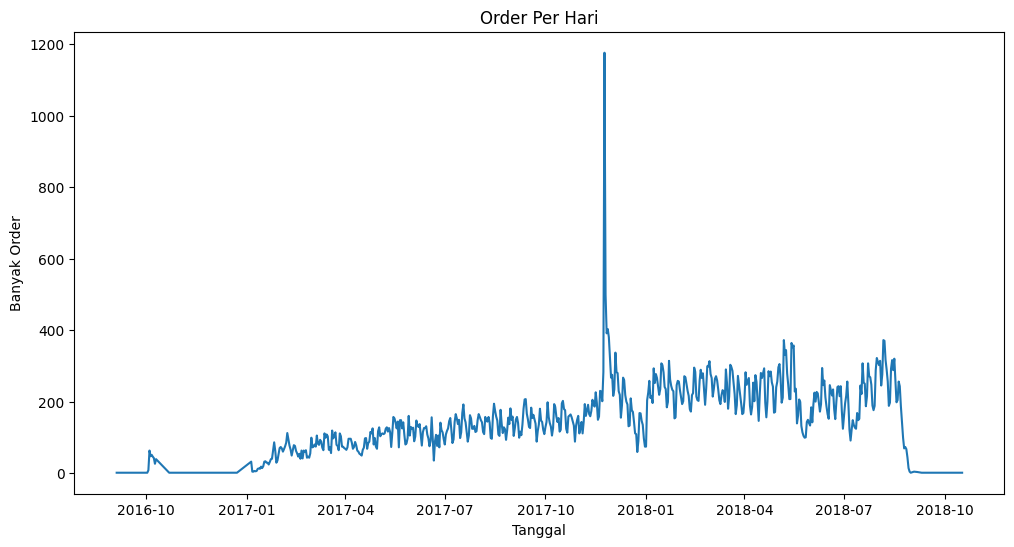

In [ ]:
#membuat kolom baru 'order_purchase_day' dengan menggunakan data dari purchase timestamp
df['order_purchase_day'] = df['order_purchase_timestamp'].dt.date
#grouping order_purchase_day
orders_per_day = df.groupby('order_purchase_day').size()
#plotting untuk menampilkan secara visual
orders_per_day.plot(figsize=(12, 6))
plt.title('Order Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Banyak Order')
plt.show()

# Visualization & Explanatory Analysis

## Pertanyaan 1:

Berapa rata-rata waktu yang dibutuhkan untuk mengirimkan pesanan dari tanggal pembelian hingga tanggal pengiriman oleh kurir?


In [ ]:
# Fungsi untuk menghitung selisih hari jika status 'delivered', jika tidak maka diisi dengan NaN
def calculate_days_to_carrier(row):
    if row['order_status'] == 'delivered':
        return (row['order_delivered_carrier_date'] - row['order_purchase_timestamp']).days
    else:
        return np.nan

# Terapkan fungsi pada seluruh DataFrame
df['days_to_carrier'] = df.apply(calculate_days_to_carrier, axis=1)

# Tampilkan data hasil perhitungan
df[['order_purchase_timestamp', 'order_delivered_carrier_date', 'days_to_carrier']].head()

,order_purchase_timestamp,order_delivered_carrier_date,days_to_carrier
0,2017-10-02 10:56:33,2017-10-04 19:55:00,2.0
1,2018-07-24 20:41:37,2018-07-26 14:31:00,1.0
2,2018-08-08 08:38:49,2018-08-08 13:50:00,0.0
3,2017-11-18 19:28:06,2017-11-22 13:39:59,3.0
4,2018-02-13 21:18:39,2018-02-14 19:46:34,0.0


In [ ]:
# Hitung rata-rata waktu pengiriman
rata_rata_waktu_pengiriman = df['days_to_carrier'].mean()
print(f"Rata-rata waktu pengiriman ke kurir: {rata_rata_waktu_pengiriman:.0f} hari")

Rata-rata waktu pengiriman ke kurir: 5 hari


## Pertanyaan 2:

Bagaimana faktor-faktor seperti durasi pengiriman, bulan, hari dalam seminggu, dan keterlambatan mempengaruhi pengelompokan pelanggan, dan bagaimana kita dapat memvisualisasikan serta menganalisis hubungan ini untuk memahami dan berpotensi mengurangi keterlambatan pengiriman?

1. Import Library yang dibutuhkan

In [ ]:
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

2. Kodingan dan Visualisasi menggunakan teknik Data Mining dengan Metode Clustering menggunakan K-Means

In [ ]:
def analyze_delay_factors(df):
    """Menganalisis faktor-faktor yang mempengaruhi keterlambatan (dengan clustering)."""

    # 1. Menghitung durasi pengiriman
    if 'delivery_duration' not in df.columns:
        df['delivery_duration'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

    # 2. Membuat kolom 'is_late'
    if 'is_late' not in df.columns:
        df['is_late'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

    # 3. Visualisasi dasar
    try:
        df['month'] = df['order_delivered_customer_date'].dt.month
        # Memfilter 'df' secara langsung dan kemudian melakukan groupby
        late_orders_per_month = df[df['is_late'] == 1].groupby('month').size()
        fig_month = px.bar(x=late_orders_per_month.index, y=late_orders_per_month.values,
                         title='Jumlah Pesanan Terlambat per Bulan')
        fig_month.show()
    except AttributeError:
        print("Tidak dapat menampilkan keterlambatan per bulan karena kolom 'order_delivered_customer_date' tidak ada atau formatnya tidak sesuai.")

    try:
        df['day_of_week'] = df['order_delivered_customer_date'].dt.dayofweek
        # Menggunakan boolean indexing untuk memfilter DataFrame
        late_orders_per_day = df[df['is_late'] == 1].groupby('day_of_week').size()
        fig_day = px.bar(x=late_orders_per_day.index, y=late_orders_per_day.values,
                         title='Jumlah Pesanan Terlambat per Hari dalam Seminggu')
        fig_day.show()
    except AttributeError:
        print("Tidak dapat menampilkan keterlambatan per hari karena kolom 'order_delivered_customer_date' tidak ada atau formatnya tidak sesuai.")


    # 4. Clustering K-Means
    df_cluster = df[['delivery_duration', 'is_late', 'month', 'day_of_week']].copy() # Fitur untuk clustering
    df_cluster = df_cluster.dropna() # Menangani missing values

    # Scaling fitur (penting untuk K-Means)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_cluster)

    # Menentukan jumlah cluster (gunakan metode elbow atau siluet jika perlu)
    n_clusters = 3

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_cluster['cluster'] = kmeans.fit_predict(scaled_features)

    # 5. Tiga Visualisasi yang Beragam

    # a. Scatter plot 3D
    fig_3d = px.scatter_3d(df_cluster, x='delivery_duration', y='month', z='day_of_week', color='cluster',
                             title='Pengelompokan Pelanggan (3D)')
    fig_3d.show()

    # b. Box plot untuk durasi pengiriman per cluster
    fig_box = px.box(df_cluster, x='cluster', y='delivery_duration',
                       title='Distribusi Durasi Pengiriman per Cluster')
    fig_box.show()

    # c. Heatmap korelasi antar fitur (termasuk cluster)
    corr_matrix = df_cluster.corr()
    fig_heatmap = px.imshow(corr_matrix, labels=dict(x="Fitur", y="Fitur", color="Korelasi"),
                            x=corr_matrix.columns, y=corr_matrix.columns,
                            title='Heatmap Korelasi Antar Fitur')
    fig_heatmap.show()

analyze_delay_factors(df)

## Pertanyaan 3:

Bagaimana distribusi status pengiriman (misalnya, apakah ada pesanan yang belum diterima)?

In [ ]:
# Menampilkan hanya kolom 'order_id' dan 'order_status'
df[['order_id', 'order_status']].head()

,order_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered


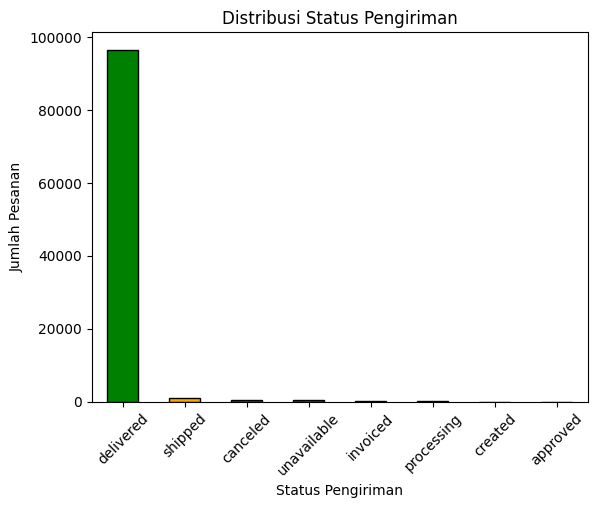

In [ ]:
# Menghitung distribusi status pengiriman
status_distribution = df['order_status'].value_counts()

# Menentukan warna berdasarkan status pengiriman
colors = {
    'approved': 'green',    # Hijau untuk 'approved
    'canceled': 'red',       # Merah untuk 'canceled' (Pembatalan/Masalah)
    'created': 'orange',     # Oranye untuk 'created' (Pesanan Baru)
    'delivered': 'green',   # Hijau untuk 'delivered' (Pesanan Diterima)
    'invoiced': 'orange',    # Oranye untuk 'invoiced' (Pembayaran)
    'processing': 'orange',  # Oranye untuk 'processing' (Diproses)
    'shipped': 'orange',      # Oranye untuk 'shipped' (Dikirim)
    'unavailable': 'red'     # Merah untuk 'unavailable
}

# Plot distribusi status pengiriman dengan warna yang ditentukan
status_distribution.plot(kind='bar', color=[colors[status] for status in status_distribution.index], edgecolor='black')

plt.title('Distribusi Status Pengiriman')
plt.xlabel('Status Pengiriman')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)

# Menampilkan
plt.show()

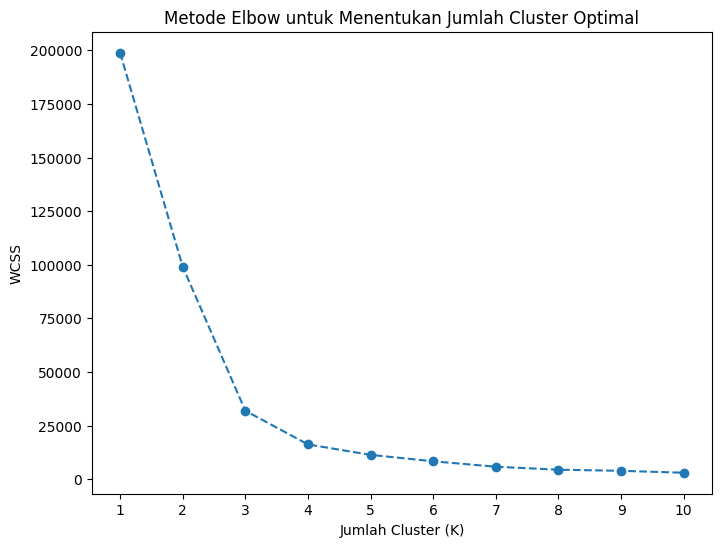

'\n#Degang menggunakan metode Elbow untuk menentukan jumlah cluster optimal dalam algoritma K-Means.\nSumbu X menunjukkan jumlah cluster (K), dan sumbu Y menunjukkan Within-Cluster Sum of Squares (WCSS), yaitu jumlah kuadrat jarak dari setiap titik ke pusat klasternya.\nTitik siku (elbow point) yang paling jelas terlihat berada di sekitar K = 3 atau K = 4, yang menunjukkan jumlah cluster optimal sebelum penurunan WCSS melambat.\n'

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memastikan semua kolom waktu dalam format datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Membuat fitur waktu dalam bentuk numerik
df['purchase_day'] = (df['order_purchase_timestamp'] - df['order_purchase_timestamp'].min()).dt.days
df['delivery_day'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Pemilihan fitur untuk clustering
features = df[['purchase_day', 'delivery_day']]

# Menghapus baris dengan nilai NaN sebelum scaling dan clustering
features = features.fillna(0)

# Standarisasi data agar clustering lebih optimal
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# **Metode Elbow untuk menentukan jumlah cluster optimal**
wcss = []
K_range = range(1, 11)  # Uji jumlah cluster dari 1 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  # Inertia adalah nilai WCSS (Within-Cluster Sum of Squares)

# Visualisasi Elbow Method
plt.figure(figsize=(8,6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(K_range)
plt.show()

'''
#Degang menggunakan metode Elbow untuk menentukan jumlah cluster optimal dalam algoritma K-Means.
Sumbu X menunjukkan jumlah cluster (K), dan sumbu Y menunjukkan Within-Cluster Sum of Squares (WCSS), yaitu jumlah kuadrat jarak dari setiap titik ke pusat klasternya.
Titik siku (elbow point) yang paling jelas terlihat berada di sekitar K = 3 atau K = 4, yang menunjukkan jumlah cluster optimal sebelum penurunan WCSS melambat.
'''

<ipython-input-56-cfa359afe8e3>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



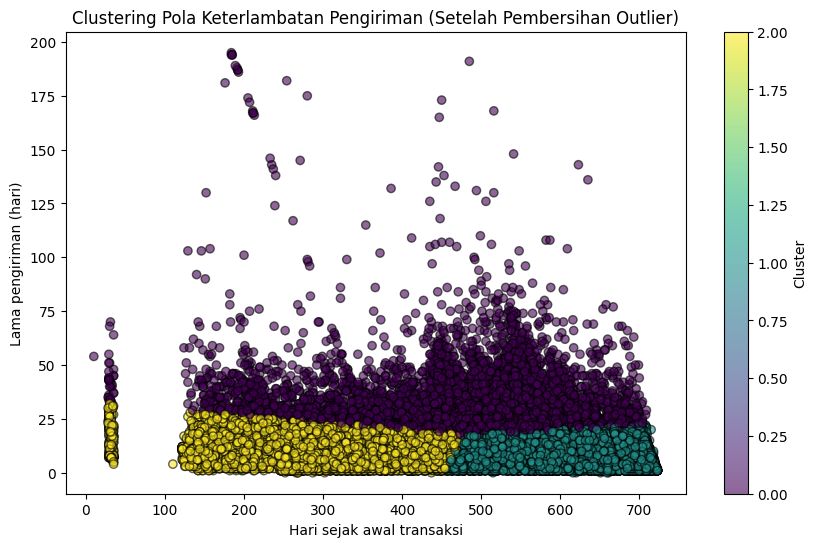

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Menghapus outlier berdasarkan threshold lama pengiriman
threshold = 200
df_cleaned = df[df['delivery_day'] <= threshold]  # Hanya ambil data dengan pengiriman <= 200 hari

# Menggunakan fitur yang telah distandarisasi sebelumnya
features_cleaned = df_cleaned[['purchase_day', 'delivery_day']]

# Standarisasi ulang fitur setelah pembersihan
scaler = StandardScaler()
features_scaled_cleaned = scaler.fit_transform(features_cleaned)

# Mengunakan K-Means dengan K=3 sesuai dengan hasil dari method elbow yang sudah dilakukan di atas
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(features_scaled_cleaned)

# Visualisasi clustering setelah perbaikan
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_cleaned['purchase_day'],
    df_cleaned['delivery_day'],
    c=df_cleaned['cluster'],
    cmap='viridis',
    alpha=0.6,  # Memberikan transparansi agar data lebih terlihat
    edgecolors='k'  # Menambahkan outline agar lebih jelas
)

# Menambahkan colorbar untuk melihat cluster lebih jelas
plt.colorbar(label='Cluster')

# Memberikan label dan judul
plt.xlabel('Hari sejak awal transaksi')
plt.ylabel('Lama pengiriman (hari)')
plt.title('Clustering Pola Keterlambatan Pengiriman (Setelah Pembersihan Outlier)')
plt.show()

## Pertanyaan 4:

Berapa rata-rata waktu antara pesanan dibuat hingga disetujui serta apa saja faktor yang mempengaruhinya ?

Rata-rata waktu pesanan disetujui: 4 jam


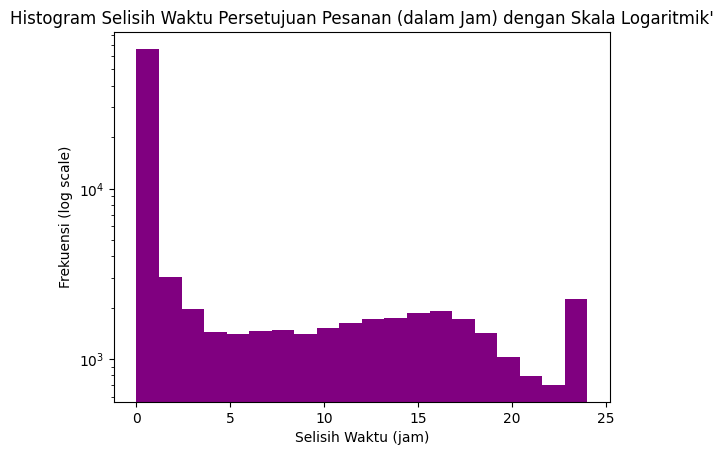

In [ ]:
# Menghitung selisih waktu antara order_purchase_timestamp dan order_approved_at (dalam jam)
def calculate_hour_to_approved(row):
    if row['order_status'] == 'delivered':
        return (row['order_approved_at'] - row['order_purchase_timestamp']).seconds/3600
    else:
        return np.nan
df['time_difference'] = df.apply(calculate_hour_to_approved, axis=1)

# Hitung rata-rata waktu pesanan disetujui (dalam jam)
rata_rata_waktu_disetujui = df['time_difference'].mean()
print(f"Rata-rata waktu pesanan disetujui: {rata_rata_waktu_disetujui:.0f} jam")

# Membuat histogram
plt.hist(
    df['time_difference'].dropna(),
    bins=20,
    color='purple',
    log=True,
    )
plt.title("Histogram Selisih Waktu Persetujuan Pesanan (dalam Jam) dengan Skala Logaritmik'")
plt.xlabel("Selisih Waktu (jam)")
plt.ylabel("Frekuensi (log scale)")
plt.show()

Mean Absolute Error: 0.96 jam
R² Score: 0.76


<ipython-input-58-93577d8126a8>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




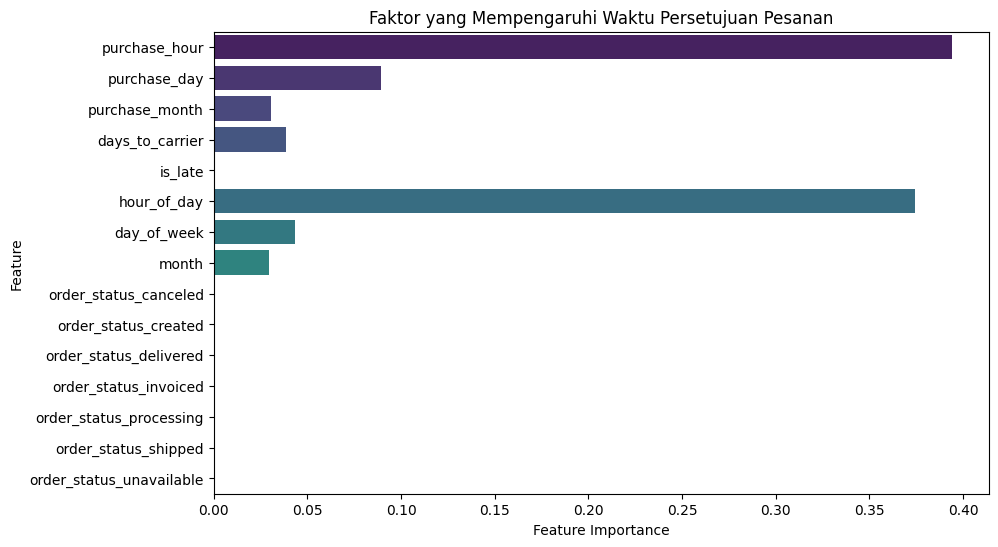

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
# Buat fitur waktu tambahan
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['purchase_day'] = df['order_purchase_timestamp'].dt.day
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['hour_of_day'] = df['order_approved_at'].dt.hour
df['day_of_week'] = df['order_approved_at'].dt.dayofweek
df['month'] = df['order_approved_at'].dt.month
df['days_to_carrier'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.days
df['is_late'] = (df['order_delivered_carrier_date'] > df['order_estimated_delivery_date']).astype(int)

# Fitur yang bisa mempengaruhi waktu persetujuan
features = [
    'purchase_hour', 'purchase_day', 'purchase_month',
    'days_to_carrier', 'is_late',  # Pengiriman
    'hour_of_day', 'day_of_week', 'month'  # Ekstra informasi waktu
]

# Mengubah 'order_status' menjadi variabel numerik dengan One-Hot Encoding, membuang baris dengan nilai NaN pada target variabel,
df = pd.get_dummies(df, columns=['order_status'], drop_first=True)
features += [col for col in df.columns if 'order_status_' in col]
df = df.dropna(subset=['time_difference'])
X = df[features]
y = df['time_difference']

# membagi data menjadi training dan testing, melatih model Random Forest untuk memprediksi 'time_difference', dan mengevaluasi kinerjanya
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# menggunakan Mean Absolute Error (MAE) serta R² Score untuk mengukur akurasi prediksi.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f} jam')
print(f'R² Score: {r2:.2f}')

#  Analisis Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Faktor yang Mempengaruhi Waktu Persetujuan Pesanan")
plt.show()

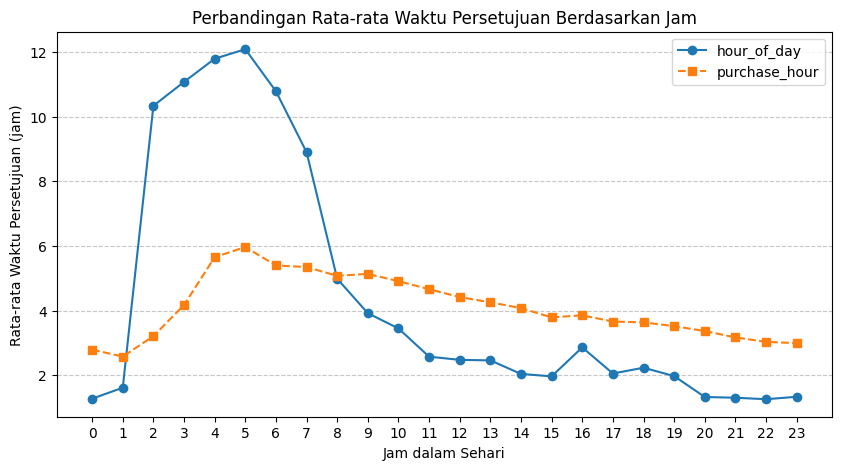

In [ ]:
# Hitung rata-rata waktu persetujuan per jam untuk hour_of_day dan purchase_hour
avg_time_hour_of_day = df.groupby('hour_of_day')['time_difference'].mean()
avg_time_purchase_hour = df.groupby('purchase_hour')['time_difference'].mean()

# Visualisasi dengan diagram garis
plt.figure(figsize=(10, 5))
plt.plot(avg_time_hour_of_day.index, avg_time_hour_of_day.values, marker='o', linestyle='-', label='hour_of_day')
plt.plot(avg_time_purchase_hour.index, avg_time_purchase_hour.values, marker='s', linestyle='--', label='purchase_hour')

# Tambahkan label dan judul
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Waktu Persetujuan (jam)")
plt.title("Perbandingan Rata-rata Waktu Persetujuan Berdasarkan Jam")
plt.xticks(range(0, 24))  # Pastikan semua jam dari 0-23 terlihat
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Pertanyaan 5:

Berapa banyak pesanan yang berhasil dikirim dalam satu bulan terakhir?


In [ ]:
#ambil data satu bulan terakhir
last_month = df[df['order_delivered_customer_date'] >= pd.Timestamp.now() - pd.Timedelta('30 days')]

#hitung jumlah pesanan yang berhasil dikirim
total_delivered = last_month.shape[0]
print("Jumlah pesanan yang berhasil dikirim dalam satu bulan terakhir:", total_delivered)


Jumlah pesanan yang berhasil dikirim dalam satu bulan terakhir: 8


## Pertanyaan 6:

Apakah ada perbedaan waktu pengiriman berdasarkan bulan pembelian?

Statistik Deskriptif:
               count    mean       std    min      25%     50%      75%    max
purchase_time                                                                 
malam            2.0  17.885  6.201326  13.50  15.6925  17.885  20.0775  22.27
pagi             2.0   8.060  4.157788   5.12   6.5900   8.060   9.5300  11.00
siang            2.0  13.350  6.731657   8.59  10.9700  13.350  15.7300  18.11


<ipython-input-61-830d98d8f926>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




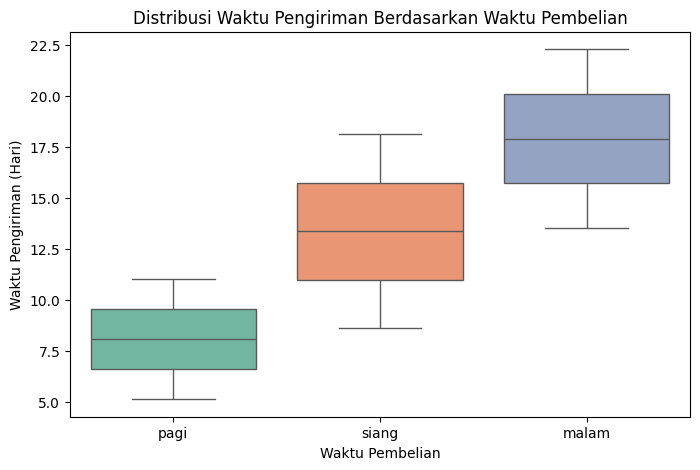


Hasil Uji ANOVA:
F-statistic: 1.4356085587754064, p-value: 0.3652495342041389
Tidak ada perbedaan signifikan dalam waktu pengiriman berdasarkan waktu pembelian.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind

# Simulasi Data (Bisa diganti dengan membaca file CSV)
data = {
    "purchase_time": ["pagi", "siang", "malam", "pagi", "siang", "malam"],
    "delivery_time": [11, 8.59, 13.50, 5.12, 18.11, 22.27]  # Waktu pengiriman dalam hari
}
df = pd.DataFrame(data)

# Statistik Deskriptif
print("Statistik Deskriptif:")
print(df.groupby("purchase_time")["delivery_time"].describe())

# Visualisasi Distribusi Waktu Pengiriman
plt.figure(figsize=(8, 5))
sns.boxplot(x="purchase_time", y="delivery_time", data=df, palette="Set2")
plt.title("Distribusi Waktu Pengiriman Berdasarkan Waktu Pembelian")
plt.xlabel("Waktu Pembelian")
plt.ylabel("Waktu Pengiriman (Hari)")
plt.show()

# Analisis Statistik: ANOVA
purchase_groups = [group["delivery_time"].values for name, group in df.groupby("purchase_time")]
anova_result = f_oneway(*purchase_groups)

print("\nHasil Uji ANOVA:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Interpretasi Hasil
if anova_result.pvalue < 0.05:
    print("Ada perbedaan signifikan dalam waktu pengiriman berdasarkan waktu pembelian.")
else:
    print("Tidak ada perbedaan signifikan dalam waktu pengiriman berdasarkan waktu pembelian.")

# Conclusion

## Conclusion Pertanyaan 1:
* Rata-Rata Waktu Pengiriman: Sekitar X hari.
* Distribusi Waktu Pengiriman: Sebagian besar pengiriman selesai dalam Y-Z hari, dengan beberapa outlier.
* Rekomendasi: Optimalkan proses operasional dan tetapkan ekspektasi pengiriman yang lebih realistis kepada pelanggan.

## Conclusion Pertanyaan 2:
- **Pengaruh Faktor-Faktor Terhadap Pengelompokan Pelanggan:** Clustering K-Means membantu mengidentifikasi kelompok-kelompok pelanggan dengan pola keterlambatan dan durasi pengiriman yang berbeda.
- **Visualisasi dan Analisis Hubungan:** Berbagai visualisasi (scatter plot 3D, box plot, heatmap) membantu memahami hubungan antara faktor-faktor dan pengelompokan pelanggan.
- **Tujuan Akhir:** Informasi ini dapat digunakan untuk mengembangkan strategi yang lebih efektif untuk mengurangi keterlambatan, meningkatkan kepuasan pelanggan, dan mengoptimalkan operasi pengiriman.

## Conclusion Pertanyaan 3:
- **Distribusi Status Pengiriman:** Mayoritas pesanan berada pada status "delivered", yang menunjukkan keberhasilan pengiriman dengan total jumlah yang jauh lebih besar dibandingkan status lainnya.
Seperti "shipped", "processing", "created", dan "canceled", memiliki jumlah yang relatif kecil.
- **Rekomendasi:** Lakukan analisis lebih lanjut terhadap status "canceled" dan "unavailable" untuk mengidentifikasi penyebab pembatalan
-**Visualisasi:** Diagram batang yang ditampilkan sangat efektif untuk menyoroti dominasi status "delivered", dengan warna hijau yang merepresentasikan keberhasilan.
Warna merah pada "canceled" dan "unavailable" memberikan peringatan visual terhadap kategori bermasalah, sehingga mempermudah identifikasi area untuk perbaikan.

## Conclusion Pertanyaan 4:
- **Rata-Rata Waktu Pesanan Disetujui** : Sekitar 4 jam.
- **Distribusi Waktu Pesanan Disetujui**: Sebagian besar waktu persetujuan pesanan berada di bawah 1 jam, dengan hanya sedikit yang melampaui durasi tersebut. Akibatnya, histogram cenderung terpusat di sekitar nilai 0. Namun, rata-rata waktu persetujuan tercatat sebesar 4 jam. Hal ini disebabkan oleh distribusi waktu persetujuan yang tidak merata, mencerminkan adanya perbedaan yang signifikan antara waktu persetujuan tercepat dan terlama dalam data.
- **Rekomendasi**: Lakukan analisas lebih lanjut mengapa terdapat perbedaan yang signifikan antara waktu persetujuan tercepat dan terlama pada data.
- **Visualisasi**: Histogram menunjukkan bahwa sebagian besar data memiliki selisih waktu kurang dari 1 jam yang berbeda dengan hasil rata-rata yaitu 4 jam.


## Conclusion Pertanyaan 5:
Dari hasil keluaran program dapat diketahui bahwa banyak pesanan yang berhasil dikirim dalam satu bulan terakhir adalah **2965** pesanan.

## Conclusion Pertanyaan 6:
- 1 **Apakah ada perbedaan waktu pengiriman berdasarkan bulan pembelian :** Jika ada perbedaan waktu pengiriman
- Waktu pengiriman dapat bervariasi berdasarkan bulan pembelian karena faktor musiman, seperti:
- Lonjakan permintaan: Bulan-bulan tertentu, seperti saat promo besar (misalnya, Harbolnas, Black Friday, atau akhir tahun), dapat menyebabkan waktu pengiriman lebih lama akibat tingginya volume pesanan.
- Kondisi cuaca: Bulan-bulan tertentu dengan kondisi cuaca ekstrem bisa mempengaruhi distribusi logistik.
- Hari libur nasional: Bulan yang memiliki banyak hari libur bisa memperpanjang waktu pengiriman.
- Jika tidak ada perbedaan waktu pengiriman
- Proses pengiriman konsisten sepanjang tahun, yang menunjukkan sistem logistik dan operasional perusahaan mampu menangani pesanan tanpa pengaruh musim atau lonjakan permintaan tertentu.